In [1]:
#load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Data Cleaning

In [2]:
#load dataset
recid_df = pd.read_csv('Recidivism.csv')
recid_df.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [3]:
#view shape
recid_df.shape

(25835, 54)

In [4]:
#only interested in recidivism within three years// drop all other recidivism columns 
#drop training sample column
#drop ID column
recid_df = recid_df.drop(columns = ['ID', 'Training_Sample', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 
                                    'Recidivism_Arrest_Year3'])

In [5]:
#look at unique values
def uniqueVals(df):
    for column in df.columns:
        print(column)
        print(df[column].unique())
        print('--------------')
uniqueVals(recid_df)

Gender
['M' 'F']
--------------
Race
['BLACK' 'WHITE']
--------------
Age_at_Release
['43-47' '33-37' '48 or older' '38-42' '18-22' '23-27' '28-32']
--------------
Residence_PUMA
[16 24 17 18  5  3 12 14 23  6  2 25 10 21  4  9 19 20 11 22  1 15  8 13
  7]
--------------
Gang_Affiliated
[False nan True]
--------------
Supervision_Risk_Score_First
[ 3.  6.  7.  4.  5.  2.  1. 10.  9.  8. nan]
--------------
Supervision_Level_First
['Standard' 'Specialized' 'High' nan]
--------------
Education_Level
['At least some college' 'Less than HS diploma' 'High School Diploma']
--------------
Dependents
['3 or more' '1' '0' '2']
--------------
Prison_Offense
['Drug' 'Violent/Non-Sex' 'Property' nan 'Other' 'Violent/Sex']
--------------
Prison_Years
['More than 3 years' '1-2 years' 'Less than 1 year'
 'Greater than 2 to 3 years']
--------------
Prior_Arrest_Episodes_Felony
['6' '7' '8' '4' '10 or more' '3' '9' '2' '5' '1' '0']
--------------
Prior_Arrest_Episodes_Misd
['6 or more' '4' '0' '1' '3' 

In [6]:
#look at data types
recid_df.dtypes

Gender                                                object
Race                                                  object
Age_at_Release                                        object
Residence_PUMA                                         int64
Gang_Affiliated                                       object
Supervision_Risk_Score_First                         float64
Supervision_Level_First                               object
Education_Level                                       object
Dependents                                            object
Prison_Offense                                        object
Prison_Years                                          object
Prior_Arrest_Episodes_Felony                          object
Prior_Arrest_Episodes_Misd                            object
Prior_Arrest_Episodes_Violent                         object
Prior_Arrest_Episodes_Property                        object
Prior_Arrest_Episodes_Drug                            object
Prior_Arrest_Episodes_PP

In [7]:
#high scale clean data
def cleanData(dataFrame):
    for column in dataFrame.columns:
        if dataFrame[column].dtypes == 'bool':
            dataFrame[column] = dataFrame[column].astype(int) #change all bools to bianary (0-False 1-True)
        if dataFrame[column].dtypes == 'object':
            dataFrame[column] = dataFrame[column].replace({'Other': np.nan})
            dataFrame[column] = dataFrame[column].replace({'3 or more': '3',
                                                           '10 or more': '10', '6 or more': '6',
                                                  '5 or more': '5', '4 or more': '4', '2 or more': '2'})#cap
    return dataFrame

In [8]:
cleanData(recid_df)
recid_df.head()

,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,...,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years
0,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3,Drug,...,2,612.000000,0.000000,0.0,0.000000,0.0,0.488562,0.447610,0,0
1,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,...,2,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.000000,0,1
2,M,BLACK,48 or older,24,False,7.0,High,At least some college,3,Drug,...,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.000000,0,1
3,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,Property,...,3,25.400000,0.000000,0.0,0.000000,0.0,1.000000,0.718996,0,0
4,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3,Violent/Non-Sex,...,0,23.117647,0.000000,0.0,0.058824,0.0,0.203562,0.929389,0,1


In [9]:
#look for missing values
print('Percent of values missing')
percent_missing = (recid_df.isna().sum()/len(recid_df)) * 100
print(round(percent_missing,2))

Percent of values missing
Gender                                                0.00
Race                                                  0.00
Age_at_Release                                        0.00
Residence_PUMA                                        0.00
Gang_Affiliated                                      12.26
Supervision_Risk_Score_First                          1.84
Supervision_Level_First                               6.66
Education_Level                                       0.00
Dependents                                            0.00
Prison_Offense                                       23.44
Prison_Years                                          0.00
Prior_Arrest_Episodes_Felony                          0.00
Prior_Arrest_Episodes_Misd                            0.00
Prior_Arrest_Episodes_Violent                         0.00
Prior_Arrest_Episodes_Property                        0.00
Prior_Arrest_Episodes_Drug                            0.00
Prior_Arrest_Episodes_PPViolat

In [10]:
#remove all instances of drug tests as the percentage of missing variables is high
missing_vars = ['Avg_Days_per_DrugTest', 'DrugTests_THC_Positive', 'DrugTests_Cocaine_Positive', 
                'DrugTests_Meth_Positive', 'DrugTests_Other_Positive']
recid_df2 = recid_df.drop(missing_vars, axis = 1)

In [11]:
#drop all instances with at least one missing variable
recid_df2 = recid_df2.dropna()

In [12]:
#check that it worked
print(recid_df2.shape)
print(recid_df2.isna().sum())

(15360, 44)
Gender                                               0
Race                                                 0
Age_at_Release                                       0
Residence_PUMA                                       0
Gang_Affiliated                                      0
Supervision_Risk_Score_First                         0
Supervision_Level_First                              0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_DVCharges                      

In [13]:
#fine tune data types cleaning
recid_df2['Gang_Affiliated'] = recid_df2['Gang_Affiliated'].astype('int') #turn gang affiliation to binary outcome

#change categorical data to categorical data type
categories = ['Gender', 'Race', 'Age_at_Release', 'Supervision_Level_First', 'Education_Level', 'Prison_Offense', 
              'Prison_Years', 'Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
             'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges',
             'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole','Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
             'Condition_Other', 'Violations_ElectronicMonitoring', 'Violations_Instruction', 'Violations_FailToReport',
             'Violations_MoveWithoutPermission', 'Employment_Exempt']
recid_df2[categories] = recid_df2[categories].astype('category')

#change numerical data to int
numerical = ['Residence_PUMA', 'Supervision_Risk_Score_First','Dependents', 
             'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
             'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges',
            'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Prop',
            'Prior_Conviction_Episodes_Drug', 'Delinquency_Reports', 'Program_Attendances', 'Program_UnexcusedAbsences',
            'Residence_Changes']
recid_df2[numerical] = recid_df2[numerical].astype('int')

In [14]:
#check
recid_df2.dtypes

Gender                                               category
Race                                                 category
Age_at_Release                                       category
Residence_PUMA                                          int64
Gang_Affiliated                                      category
Supervision_Risk_Score_First                            int64
Supervision_Level_First                              category
Education_Level                                      category
Dependents                                              int64
Prison_Offense                                       category
Prison_Years                                         category
Prior_Arrest_Episodes_Felony                            int64
Prior_Arrest_Episodes_Misd                              int64
Prior_Arrest_Episodes_Violent                           int64
Prior_Arrest_Episodes_Property                          int64
Prior_Arrest_Episodes_Drug                              int64
Prior_Ar

In [15]:
#copy cleaned data to final data frame
final_df = recid_df2.copy()

# Data Exploration

In [16]:
#categorical features
cat_features = categories
print(cat_features)
#numeric features
numeric_features = final_df.drop(columns = cat_features)

num_features = numeric_features.columns.values.tolist()
num_features = num_features[:20]
print(num_features)

['Gender', 'Race', 'Age_at_Release', 'Supervision_Level_First', 'Education_Level', 'Prison_Offense', 'Prison_Years', 'Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed', 'Condition_Other', 'Violations_ElectronicMonitoring', 'Violations_Instruction', 'Violations_FailToReport', 'Violations_MoveWithoutPermission', 'Employment_Exempt']
['Residence_PUMA', 'Supervision_Risk_Score_First', 'Dependents', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_

/var/folders/lk/vv17zpzn1jxczzyz5_5m8md00000gn/T/ipykernel_13844/2838178366.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


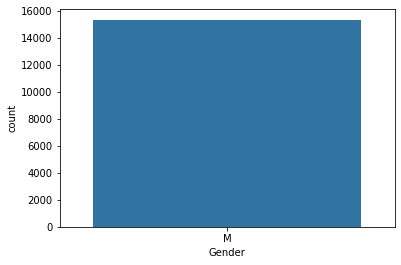

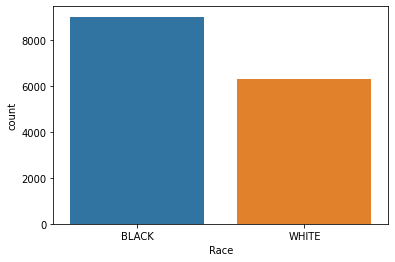

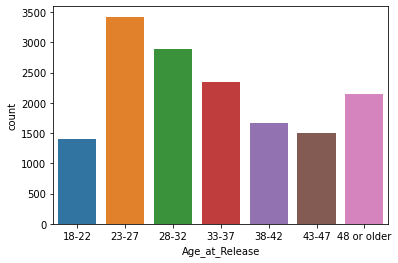

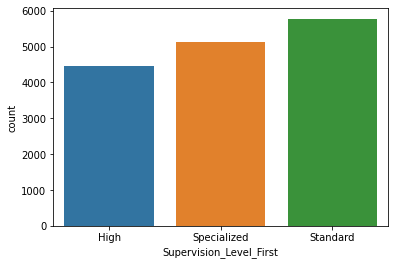

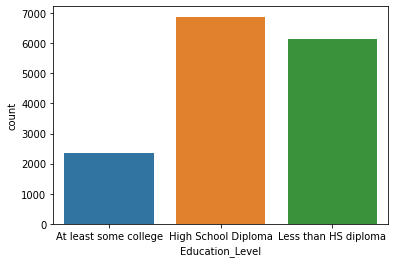

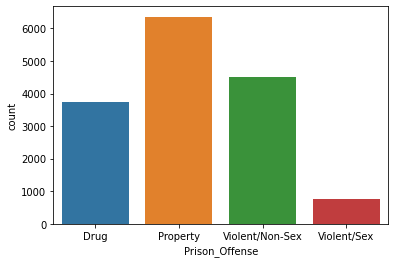

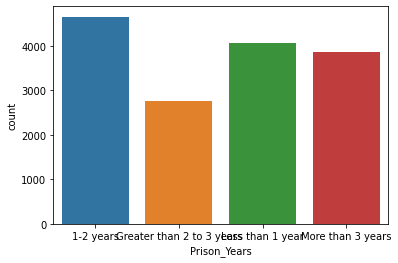

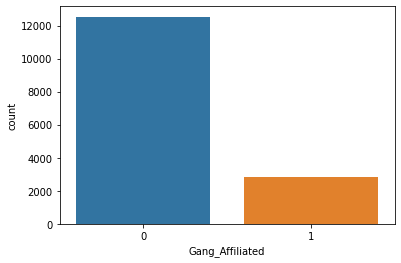

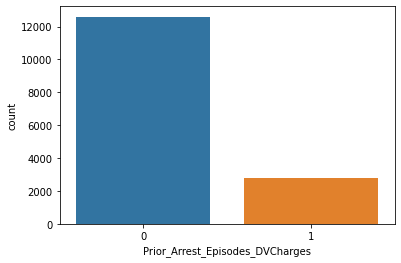

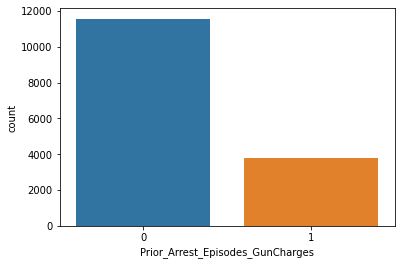

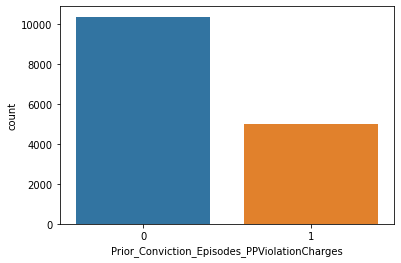

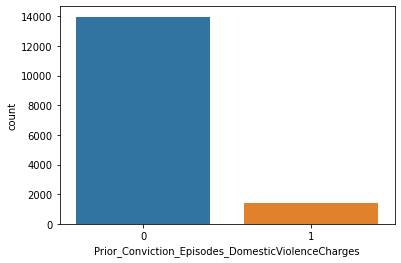

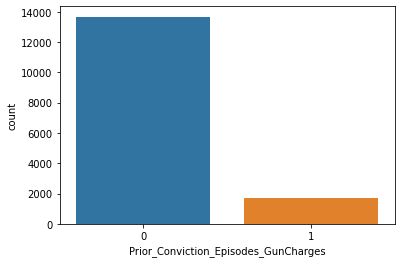

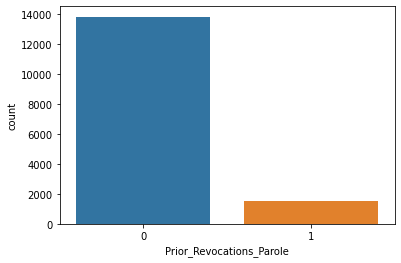

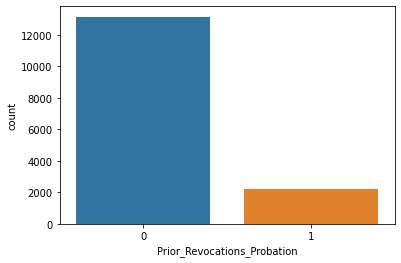

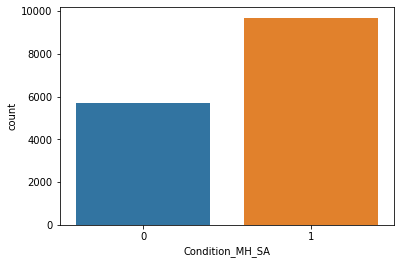

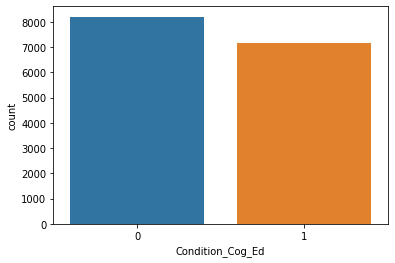

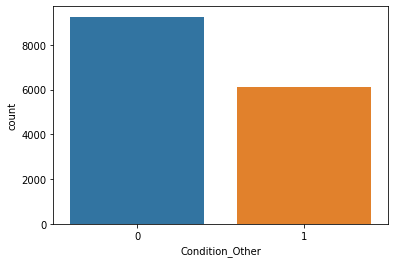

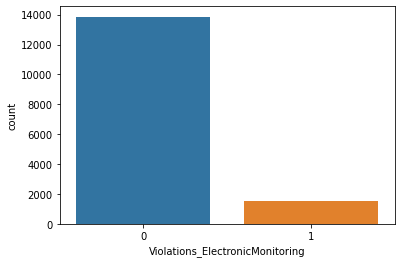

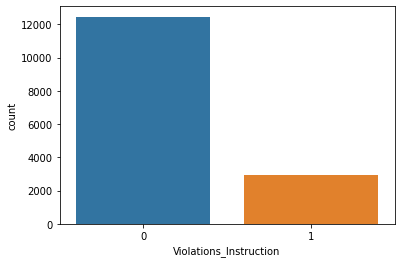

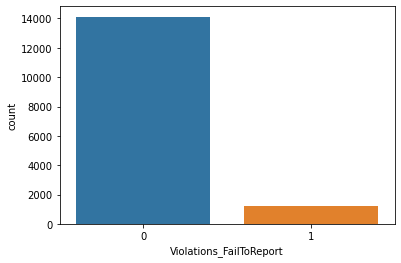

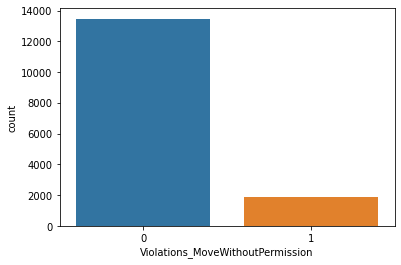

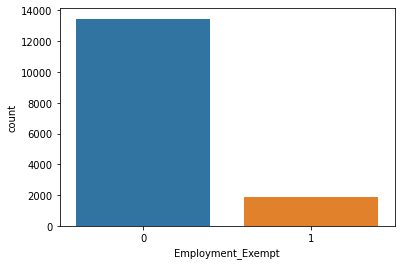

In [17]:
for item in cat_features:
    plt.figure()
    sns.countplot(x=final_df[item])

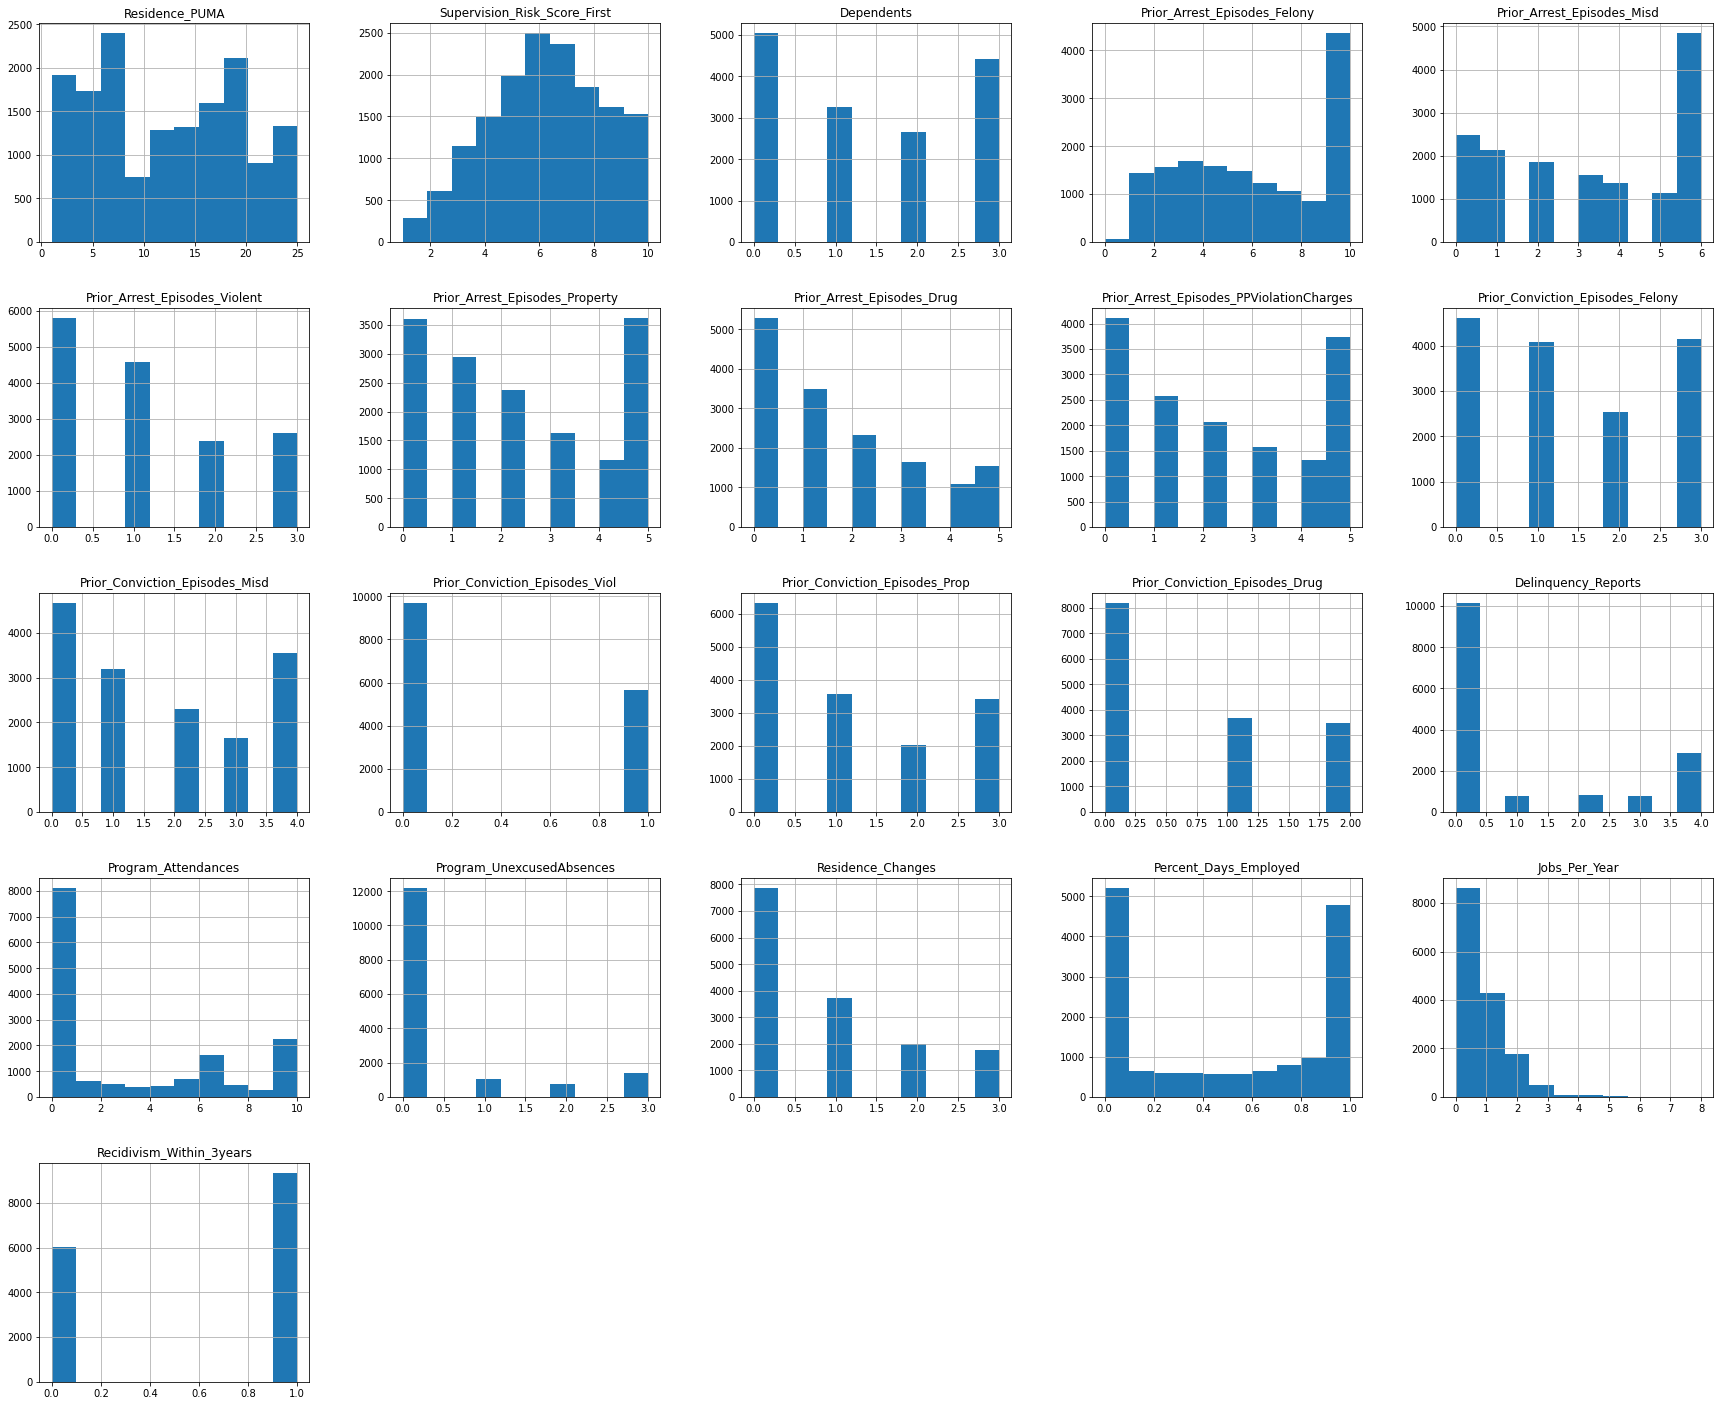

In [18]:
#look at distribution of numeric variables
%matplotlib inline
final_df.hist(bins=10, figsize=(30,25))
plt.show()

In [19]:
#look at descriptive statistics
final_df[num_features].apply(['mean', 'median','std', 'max', 'min', 'skew', 'kurtosis'])

,Residence_PUMA,Supervision_Risk_Score_First,Dependents,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Percent_Days_Employed,Jobs_Per_Year
mean,12.253841,6.312240,1.419987,5.733659,3.298372,1.117904,2.303255,1.635156,2.300130,1.404167,1.752799,0.369596,1.164844,0.694922,1.055404,2.961198,0.436654,0.849349,0.494642,0.787826
median,12.000000,6.000000,1.000000,5.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508828,0.647128
std,7.140007,2.314637,1.214365,3.178188,2.293117,1.095287,1.889751,1.661885,1.943475,1.174610,1.546644,0.482711,1.185470,0.816300,1.611330,3.743961,0.941701,1.040410,0.421293,0.825501
max,25.000000,10.000000,3.000000,10.000000,6.000000,3.000000,5.000000,5.000000,5.000000,3.000000,4.000000,1.000000,3.000000,2.000000,4.000000,10.000000,3.000000,3.000000,1.000000,8.000000
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skew,0.118942,-0.198935,0.119173,0.062782,-0.093607,0.543673,0.256020,0.758655,0.219469,0.174138,0.298111,0.540367,0.478528,0.612577,1.056379,0.814127,1.987429,0.921564,-0.013789,1.493923
kurtosis,-1.245844,-0.722458,-1.550717,-1.381003,-1.526987,-1.039588,-1.409360,-0.644786,-1.485454,-1.454616,-1.413622,-1.708226,-1.308514,-1.231470,-0.676658,-0.899611,2.399453,-0.461354,-1.729611,3.408654


# Data Preparation

In [20]:
#standardize numeric variables using standard scaler
scaler = StandardScaler()
standardized_features = scaler.fit_transform(final_df[num_features])

In [21]:
std_df = pd.DataFrame(standardized_features)

In [22]:
#append standardized features to final data frame
final_df.reset_index(drop=True, inplace=True)
std_df.reset_index(drop=True, inplace=True)
final_df = pd.concat([final_df,std_df], axis = 1)
final_df.drop(num_features, axis="columns", inplace=True)

In [23]:
#rename columns
rename = {0:'Residence_PUMA', 1:'Supervision_Risk_Score_First', 
          2:'Dependents', 3:'Prior_Arrest_Episodes_Felony', 4: 'Prior_Arrest_Episodes_Misd', 
          5:'Prior_Arrest_Episodes_Violent', 6:'Prior_Arrest_Episodes_Property', 7:'Prior_Arrest_Episodes_Drug',
         8:'Prior_Arrest_Episodes_PPViolationCharges', 
         9:'Prior_Conviction_Episodes_Felony', 10:'Prior_Conviction_Episodes_Misd', 11:'Prior_Conviction_Episodes_Viol',
         12:'Prior_Conviction_Episodes_Prop', 13:'Prior_Conviction_Episodes_Drug', 14:'Delinquency_Reports',
         15: 'Program_Attendances', 16:'Program_UnexcusedAbsences', 17:'Residence_Changes',
         18: 'Percent_Days_Employed', 19: 'Jobs_Per_Year'}
final_df.rename(columns=rename, inplace=True)

In [24]:
final_df.head()

,Gender,Race,Age_at_Release,Gang_Affiliated,Supervision_Level_First,Education_Level,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,...,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Percent_Days_Employed,Jobs_Per_Year
0,M,BLACK,43-47,0,Standard,At least some college,Drug,More than 3 years,0,0,...,0.806418,-0.765693,0.704517,1.598825,-0.655011,0.811681,-0.463701,1.105995,-0.014432,-0.412146
1,M,BLACK,33-37,0,Specialized,Less than HS diploma,Violent/Non-Sex,More than 3 years,1,0,...,1.453000,1.306007,-0.982632,1.598825,1.827492,-0.790952,-0.463701,1.105995,-0.164756,1.468457
2,M,BLACK,48 or older,0,High,At least some college,Drug,1-2 years,1,0,...,0.159835,1.306007,-0.139058,1.598825,1.827492,0.811681,-0.463701,-0.816386,-1.174143,-0.954392
3,M,WHITE,38-42,0,High,Less than HS diploma,Property,1-2 years,0,0,...,1.453000,-0.765693,1.548091,1.598825,-0.655011,0.811681,-0.463701,2.067186,1.199580,-0.083382
4,M,WHITE,33-37,0,Specialized,Less than HS diploma,Violent/Non-Sex,1-2 years,1,0,...,-1.133329,1.306007,-0.982632,0.373745,-0.655011,1.078786,-0.463701,-0.816386,-0.690943,0.171493


In [25]:
#drop gender column
final_df.drop(columns = ['Gender'], inplace = True)

In [26]:
categorical_features = ['Race', 'Age_at_Release', 'Supervision_Level_First', 'Education_Level', 'Prison_Offense', 
              'Prison_Years']

In [27]:
#get dummies for categorical data
final_df = pd.get_dummies(data = final_df, columns = categorical_features)
final_df.head()

,Gang_Affiliated,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,...,Education_Level_High School Diploma,Education_Level_Less than HS diploma,Prison_Offense_Drug,Prison_Offense_Property,Prison_Offense_Violent/Non-Sex,Prison_Offense_Violent/Sex,Prison_Years_1-2 years,Prison_Years_Greater than 2 to 3 years,Prison_Years_Less than 1 year,Prison_Years_More than 3 years
0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [28]:
#look at size
final_df.shape

(15360, 60)

In [29]:
final_df.isna().sum()

Gang_Affiliated                                      0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Conviction_Episodes_PPViolationCharges         0
Prior_Conviction_Episodes_DomesticViolenceCharges    0
Prior_Conviction_Episodes_GunCharges                 0
Prior_Revocations_Parole                             0
Prior_Revocations_Probation                          0
Condition_MH_SA                                      0
Condition_Cog_Ed                                     0
Condition_Other                                      0
Violations_ElectronicMonitoring                      0
Violations_Instruction                               0
Violations_FailToReport                              0
Violations_MoveWithoutPermission                     0
Employment_Exempt                                    0
Recidivism_Within_3years                             0
Residence_PUMA                                       0
Supervisio

In [30]:
#split into training and test
train, test = train_test_split(final_df, test_size = .3, random_state = 42)

In [31]:
#get input and output variables
X_train = train.drop('Recidivism_Within_3years', axis = 1)
print('X_train Shape:', X_train.shape)
y_train = train['Recidivism_Within_3years'].copy()
print('y_train Shape:', y_train.shape)
X_test = test.drop('Recidivism_Within_3years', axis = 1)
print('X_test Shape:', X_test.shape)
y_test = test['Recidivism_Within_3years'].copy()
print('y_test Shape:', y_test.shape)

X_train Shape: (10752, 59)
y_train Shape: (10752,)
X_test Shape: (4608, 59)
y_test Shape: (4608,)


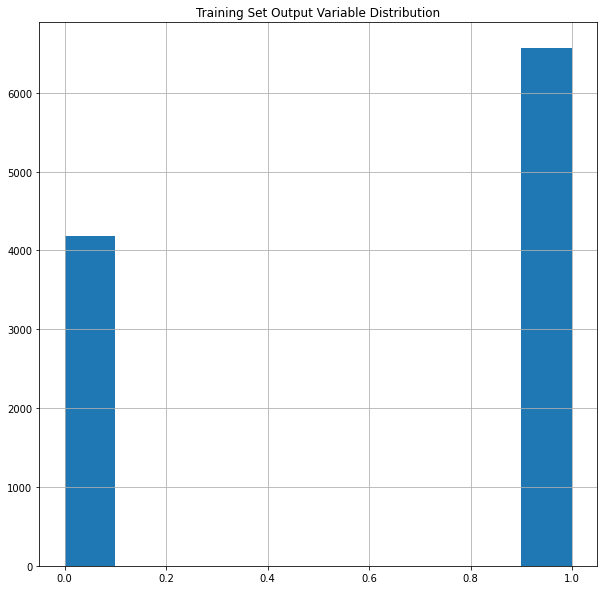

In [32]:
#look at distribution of output variable for training set
%matplotlib inline
y_train.hist(bins=10, figsize=(10,10))
plt.title('Training Set Output Variable Distribution')
plt.show()

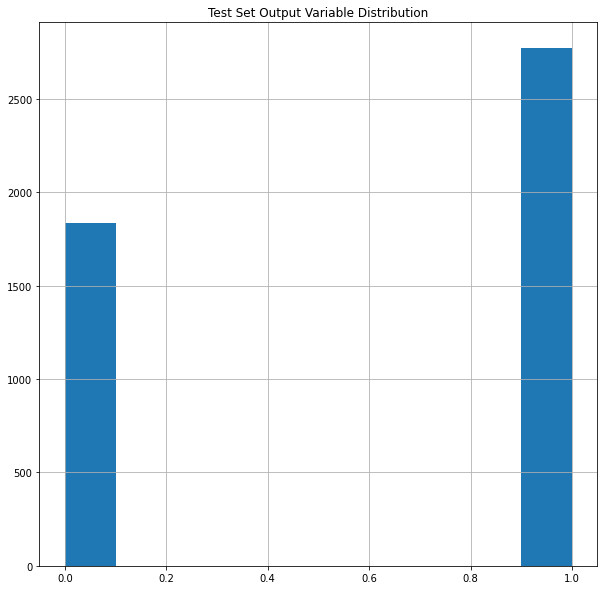

In [33]:
#look at distribution of output variable for test set
%matplotlib inline
y_test.hist(bins=10, figsize=(10,10))
plt.title('Test Set Output Variable Distribution')
plt.show()

In [34]:
#run PCA
pca = PCA(n_components=2)
pca_Train = pca.fit_transform(X_train)
pca_Test = pca.fit_transform(X_test)

# Model Building and Evaluation

In [35]:
#initialize models
DT = DecisionTreeClassifier()
FR = RandomForestClassifier()
SVClass = SVC()
KNNClass = KNeighborsClassifier()

In [36]:
#fit models
tree_class = DT.fit(X_train, y_train)
forest_class = FR.fit(X_train, y_train)
SVC = SVClass.fit(X_train, y_train)
KNN = KNNClass.fit(X_train, y_train)

#get train set predictions
tree_train_pred = tree_class.predict(X_train)
forest_train_pred = forest_class.predict(X_train)
SVC_train_pred = SVC.predict(X_train)
KNN_train_pred = KNN.predict(X_train)

#get test set predictions
tree_test_pred = tree_class.predict(X_test)
forest_test_pred = forest_class.predict(X_test)
SVC_test_pred = SVC.predict(X_test)
KNN_test_pred = KNN.predict(X_test)

In [37]:
#view accuracy scores on full dataset
print('Decision Tree Classifier')
print('-------------------------')
print('Train Set Accuracy:', accuracy_score(y_train, tree_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, tree_test_pred))
print()
print('Random Forest Classifier')
print('-------------------------')
print('Train Set Accuracy:', accuracy_score(y_train, forest_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, forest_test_pred))
print()
print('SVC')
print('----')
print('Train Set Accuracy:', accuracy_score(y_train, SVC_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, SVC_test_pred))
print()
print('KNN Classifier')
print('----------------')
print('Train Set Accuracy:', accuracy_score(y_train, KNN_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, KNN_test_pred))


Decision Tree Classifier
-------------------------
Train Set Accuracy: 1.0
Test Set Accuracy: 0.630859375

Random Forest Classifier
-------------------------
Train Set Accuracy: 1.0
Test Set Accuracy: 0.7274305555555556

SVC
----
Train Set Accuracy: 0.7930617559523809
Test Set Accuracy: 0.7289496527777778

KNN Classifier
----------------
Train Set Accuracy: 0.7649739583333334
Test Set Accuracy: 0.6495225694444444


In [38]:
#fit PCA models
pca_tree = DT.fit(pca_Train, y_train)
pca_forest=FR.fit(pca_Train, y_train)
pca_SVC = SVClass.fit(pca_Train, y_train)
pca_KNN = KNNClass.fit(pca_Train, y_train)

#get train set predictions
pca_tree_train_pred = pca_tree.predict(pca_Train)
pca_forest_train_pred = pca_forest.predict(pca_Train)
pca_SVC_train_pred = pca_SVC.predict(pca_Train)
pca_KNN_train_pred = pca_KNN.predict(pca_Train)

#get test set predictions
pca_tree_test_pred = pca_tree.predict(pca_Test)
pca_forest_test_pred = pca_forest.predict(pca_Test)
pca_SVC_test_pred = pca_SVC.predict(pca_Test)
pca_KNN_test_pred = pca_KNN.predict(pca_Test)

In [39]:
#look at accuracy scores for PCA
#view accuracy scores on full dataset
print('Decision Tree Classifier')
print('-------------------------')
print('Train Set Accuracy:', accuracy_score(y_train, pca_tree_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, pca_tree_test_pred))
print()
print('Random Forest Classifier')
print('-------------------------')
print('Train Set Accuracy:', accuracy_score(y_train, pca_forest_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, pca_forest_test_pred))
print()
print('SVC')
print('----')
print('Train Set Accuracy:', accuracy_score(y_train, pca_SVC_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, pca_SVC_test_pred))
print()
print('KNN Classifier')
print('----------------')
print('Train Set Accuracy:', accuracy_score(y_train, pca_KNN_train_pred))
print('Test Set Accuracy:', accuracy_score(y_test, pca_KNN_test_pred))

Decision Tree Classifier
-------------------------
Train Set Accuracy: 1.0
Test Set Accuracy: 0.5390625

Random Forest Classifier
-------------------------
Train Set Accuracy: 1.0
Test Set Accuracy: 0.5622829861111112

SVC
----
Train Set Accuracy: 0.6559709821428571
Test Set Accuracy: 0.58984375

KNN Classifier
----------------
Train Set Accuracy: 0.7328869047619048
Test Set Accuracy: 0.5638020833333334


In [40]:
#look at parameters for Decision Tree
tree_class.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [41]:
tree_params = [{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 
                'max_depth': [10,20,30,40,50]}]
tree_search = GridSearchCV(tree_class, tree_params, cv = 5)
tree_search.fit(X_train, y_train)
tree_search.best_params_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'

{'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}

Based on the grid search the best parameters are max_depth = 10, max_features = 'auto', and splitter = 'best'

In [42]:
#look at parameters for Random Forest
forest_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
forest_params = [{'bootstrap': [True, False], 'max_features': ['auto', 'sqrt', 'log2'], 
                'n_estimators': [20,40,60,80,100,120,140]}]
forest_search = GridSearchCV(forest_class, forest_params, cv = 5)
forest_search.fit(X_train, y_train)
forest_search.best_params_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 140}

Based on the grid search the best paramters are bootstrap = False, max_features = 'auto', and n_estimators = 140

In [44]:
#look at parameters for SVC
SVC.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [45]:
SVC_grid= [{'kernel': ['rbf', 'sigmoid'],'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}]
SVC_search = GridSearchCV(SVC,SVC_grid, cv=5)
SVC_search.fit(X_train, y_train)
SVC_search.best_params_

{'gamma': 0.01, 'kernel': 'rbf'}

In [46]:
#look at parameters for KNN
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [47]:
KNN_grid= [{'n_neighbors': [10,15,30,75,100]}]
KNN_search = GridSearchCV(KNN,KNN_grid, cv=5)
KNN_search.fit(X_train, y_train)
KNN_search.best_params_

{'n_neighbors': 100}

In [48]:
print('Tuned Decision Tree Scores')
print('---------------------------')
print('Train Set Score:', tree_search.score(X_train,y_train))
print('Test Set Score:', tree_search.score(X_test,y_test))
print()
print('Tuned Random Forest Scores')
print('---------------------------')
print('Train Set Score:', forest_search.score(X_train,y_train))
print('Test Set Score:', forest_search.score(X_test,y_test))
print()
print('Tuned SVC Scores')
print('---------------------------')
print('Train Set Score:', SVC_search.score(X_train,y_train))
print('Test Set Score:', SVC_search.score(X_test,y_test))
print()
print('Tuned KNN Scores')
print('---------------------------')
print('Train Set Score:', KNN_search.score(X_train,y_train))
print('Test Set Score:', KNN_search.score(X_test,y_test))

Tuned Decision Tree Scores
---------------------------
Train Set Score: 0.7375372023809523
Test Set Score: 0.6514756944444444

Tuned Random Forest Scores
---------------------------
Train Set Score: 1.0
Test Set Score: 0.728515625

Tuned SVC Scores
---------------------------
Train Set Score: 0.7410714285714286
Test Set Score: 0.7202690972222222

Tuned KNN Scores
---------------------------
Train Set Score: 0.7018229166666666
Test Set Score: 0.6885850694444444


Appears that the SVC model performs the best both before and after tuning. Random Forest model performs the worst as even after hyperparameter tuning it is still overfitting the training set.